# Undulator tapering

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
# from modules.bayes_optimization_lik_opt import BayesOpt, negUCB, negExpImprove

from modules.OnlineGP import OGP
import numpy as np
import importlib


mi_module = importlib.import_module('machine_interfaces.undulator_interface')
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline
saveResultsQ = True

#how long to wait between acquisitions
acquisition_delay = 0 

#create the machine interface
dev_ids = ['und_k']
start_point = 1    
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point)

In [20]:
# y=[]
# for i in range(10):
#     yi = mi.getState()[1][0]
#     print(yi)
#     y.append(yi) # y = [mi.getState()[1][0] for x in range(10)]
# np.std(y)

In [2]:
k=np.linspace(3,4,5)
y=[]
for i in k:
    #pass in param_K
    mi.setX(-i/1000)
    s=mi.getState()
    print(s)
    yi = s[1][0][0]
    y.append(yi) # y = [mi.getState()[1][0] for x in range(10)]
np.std(y)

(array([[-0.003]]), array([[ 1.60461314]]))
(array([[-0.00325]]), array([[ 1.23203685]]))
(array([[-0.0035]]), array([[ 1.39723059]]))
(array([[-0.00375]]), array([[ 1.19703658]]))
(array([[-0.004]]), array([[ 1.23892489]]))


0.15193703492252805

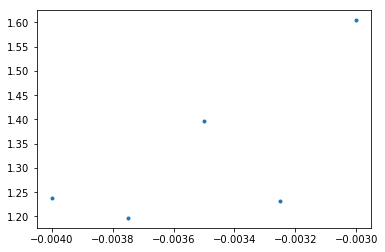

In [4]:
%matplotlib inline
plt.plot(-k/1000,y,'.')

**Create the gp**

In [15]:
# ktot = np.concatenate((ktot,k))
# ytot = np.concatenate((ytot,np.array(y)[:,None]))
# ytot.shape

In [16]:
# plt.plot(ktot,np.array(ytot)*10**(-10),'.')

In [29]:
a=np.diag(np.log(1./gp_lengthscales**(2)))
#a = 1/np.diag(gp_lengthscales**(2))
np.sqrt(1./np.exp(a))

array([[ 0.001]])

In [3]:
#build gp surrogte model
ndim = len(dev_ids)
#1. gp_lengthscales - learning rate
#gp_lengthscales = np.array([1])
#gp_lengthscales = np.array([0.0001])

gp_lengthscales = np.array([0.001])

#gp_precisionmat = 1/np.diag(gp_lengthscales**(2))

gp_precisionmat = np.diag(np.log(1./gp_lengthscales**(2)))

#2. gp_amp
gp_amp = 0.1
#gp_amp = 2.0
#3. gp_noise
#gp_noise = 0.0001 
gp_noise = 0.001 

hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP
gp = OGP(ndim, hyps)

#create the bayesian optimizer that will use the gp as the model to optimize the machine 
#opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
#mi.setX(-0.004)
#opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = -0.004, dev_ids = dev_ids, bounds=((-np.inf, 0)))


mi.setX(-0.001)
s=mi.getState()
opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = 0, dev_ids = dev_ids)

opt.ucb_params = [2,None]
print('ucb_params',opt.ucb_params)

('target_func = ', <machine_interfaces.undulator_interface.machine_interface instance at 0x0000000008428EC8>)
********* BO - self.mi = self.target_func WORKED!
Supposed to be grabbing machine state...
('x_init', array([[-0.001]]))
('y_init', array([[ 2.40677332]]))
ucb_params [2, None]


**Running BO**

*run the gp search for some number of steps*

In [4]:
Obj_state_s=[]

iteration = 0 current position: [[-0.001]] current objective value: [[ 2.40677332]]
time= 12.2680001259


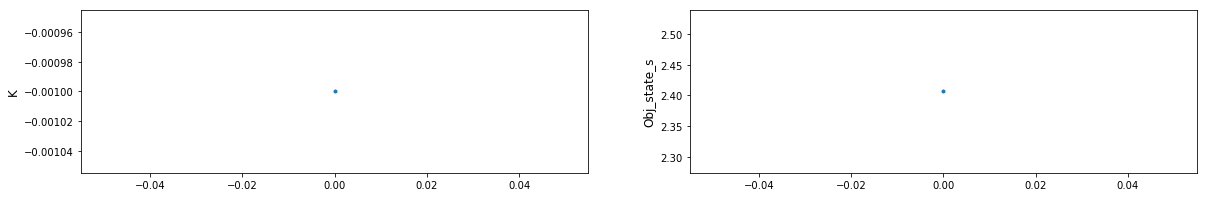

In [ ]:
import time
end = time.time()
Niter = 20
for i in range(Niter):
    #clear_output(wait=True) 
    v = mi.getState()[1]
    clear_output(wait=True)
    print ('iteration =', i, 'current position:', mi.x, 'current objective value:', v )
   
    Obj_state_s.append(mi.getState()[1][0])
    print('time=', time.time()-end)
    end = time.time()

    #plotting
    
    f = plt.figure(figsize=(20,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.set_ylabel('K',fontsize=12)
    ax.plot(opt.X_obs,'.-')
    ax2.set_ylabel('Obj_state_s',fontsize=12)
    ax2.plot(Obj_state_s,'.-')
    plt.show(); 
    

    
    #optimization
    opt.OptIter()
    
    

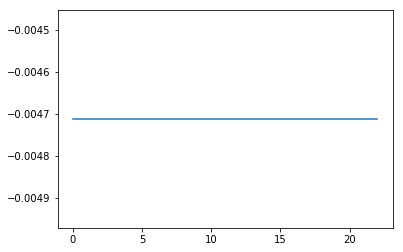

In [47]:

plt.plot(opt.X_obs[20:])

# BO with likelihood optimiztion on the fly

In [16]:
#create the machine interface
dev_ids = scan_params['dev_ids']
start_point =  start_point
mi0 = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point)


ndim = len(dev_ids)

gp_precisionmat = scan_params['gp_precisionmat']
gp_amp = scan_params['gp_amp'] 
gp_noise = scan_params['gp_noise'] #std

hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP
gp0 = OGP(ndim, hyps)

NameError: name 'scan_params' is not defined

In [ ]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
opt0 = BayesOpt(gp0, mi0, acq_func="UCB", start_dev_vals = mi0.x, dev_ids = dev_ids)
opt0.ucb_params = opt.ucb_params
print('ucb_params',opt0.ucb_params)
Obj_state_s0=[]

In [ ]:
for i in range(Niter):
    clear_output(wait=True) 
    print ('iteration =', i)
    print ('current position:', mi0.x, 'current objective value:', mi0.getState()[1])
   
    Obj_state_s0.append(mi0.getState()[1][0])
    
    f = plt.figure(figsize=(20,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.set_ylabel('Quads',fontsize=12)
    ax.plot(opt0.X_obs)
    ax2.set_ylabel('Obj_state_s',fontsize=12)
    ax2.plot(Obj_state_s0)
    plt.show(); 
    
    if (i>1) and (i<10):
        opt0.optimize_log_lik()    
        
    opt0.OptIter()


In [ ]:
#save results if desired
if saveResultsQ == True:
    timestr = datetime.now().strftime('%Y-%m-%d-%H%M%S')
    try: os.mkdir('saved_results')
    except: pass
    results = {}
    results['scan_params'] = scan_params
    results['xs'] = opt.X_obs
    results['ys'] = np.array([y[0][0] for y in opt.Y_obs])
    results['time'] = timestr
    np.save('saved_results/scan_'+timestr, results)

# UCB function 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nsteps=np.linspace(1,20,100)
ndim=4
nu=0.002*120
delta=0.4
tau = 2.*np.log(nsteps**(0.5*ndim+2.)*(np.pi**2.)/3./delta)

plt.plot(nsteps,np.sqrt(nu * tau)); plt.xlabel('nsteps');
plt.ylabel('np.sqrt(nu * tau)'); plt.title('ndim'+ str(ndim)+'UCB: [nu,delta]=['+ str(nu) + str(delta)+']'); plt.show()

ybest = 0.1
sigma_y = 0.01
plt.plot(nsteps, np.sqrt(nu * tau* sigma_y**2)); plt.xlabel('nsteps');plt.show()

In [ ]:
xs = [m*mi.x for m in np.linspace(-3, 3, 100)]
ys = [gp.predict(x)[0] for x in xs]
ys_std = [gp.predict(x)[1] for x in xs]
negEIs = [negExpImprove(x, gp, opt.best_seen()[1], 0, 1) for x in xs]
negUCBs = [negUCB(x, gp, ndim, nsteps, nu = 1., delta = 1.) for x in xs]
xs = np.array([x[0][0] for x in xs])
ys = np.array([y[0][0] for y in ys])
ys_std = np.array([y_std[0][0] for y_std in ys_std])
EIs = -1.*np.array([negEI[0][0] for negEI in negEIs])
UCBs = -1.*np.array([negUCB[0][0] for negUCB in negUCBs])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xs, ys, label='GP prediction')
plt.fill_between(xs, ys-ys_std, ys+ys_std, alpha=0.4)
plt.plot(xs, UCBs, c='g', label='UCB acq func')
plt.legend(loc=1)
plt.show()
